In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
#import opensimplex


In [15]:
def save(xs, ys, name, scale=100):
    f = open(name if name.endswith(".svg") else name + ".svg", "w")
    minx = min(map(min, xs))
    miny = min(map(min, ys))
    xs = [scale*(np.asarray(x) - minx) for x in xs]
    ys = [scale*(np.asarray(y) - miny) for y in ys]

    maxx = max(map(max, xs))
    maxy = max(map(max, ys))

    print("size:", maxx, maxy)
    
    f.write(f"""<?xml version=\"1.0\" standalone=\"no\"?>
    <!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"
    \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">
    <svg height=\"{maxy}mm\" width=\"{maxx}mm\"
    xmlns=\"http://www.w3.org/2000/svg\" version=\"1.1\"
    viewBox=\"0 0 {maxx} {maxy}\">
    """)

    for px, py in zip(xs, ys):
        f.write("<polyline points=\"")
        f.write("\n".join(f"{xx},{yy}" for xx, yy in zip(px, py)))
        f.write("\" fill=\"none\" stroke=\"black\" stroke-width=\"0.1\"/>\n")

    f.write("</svg>")
    

def show(xs, ys):
    plt.gca().set_aspect('equal')
    plt.rcParams["figure.figsize"] = (15, 15)
    for (x, y) in zip(xs, ys):
        plt.plot(np.asarray(x), -np.asarray(y), "black")
    plt.show()


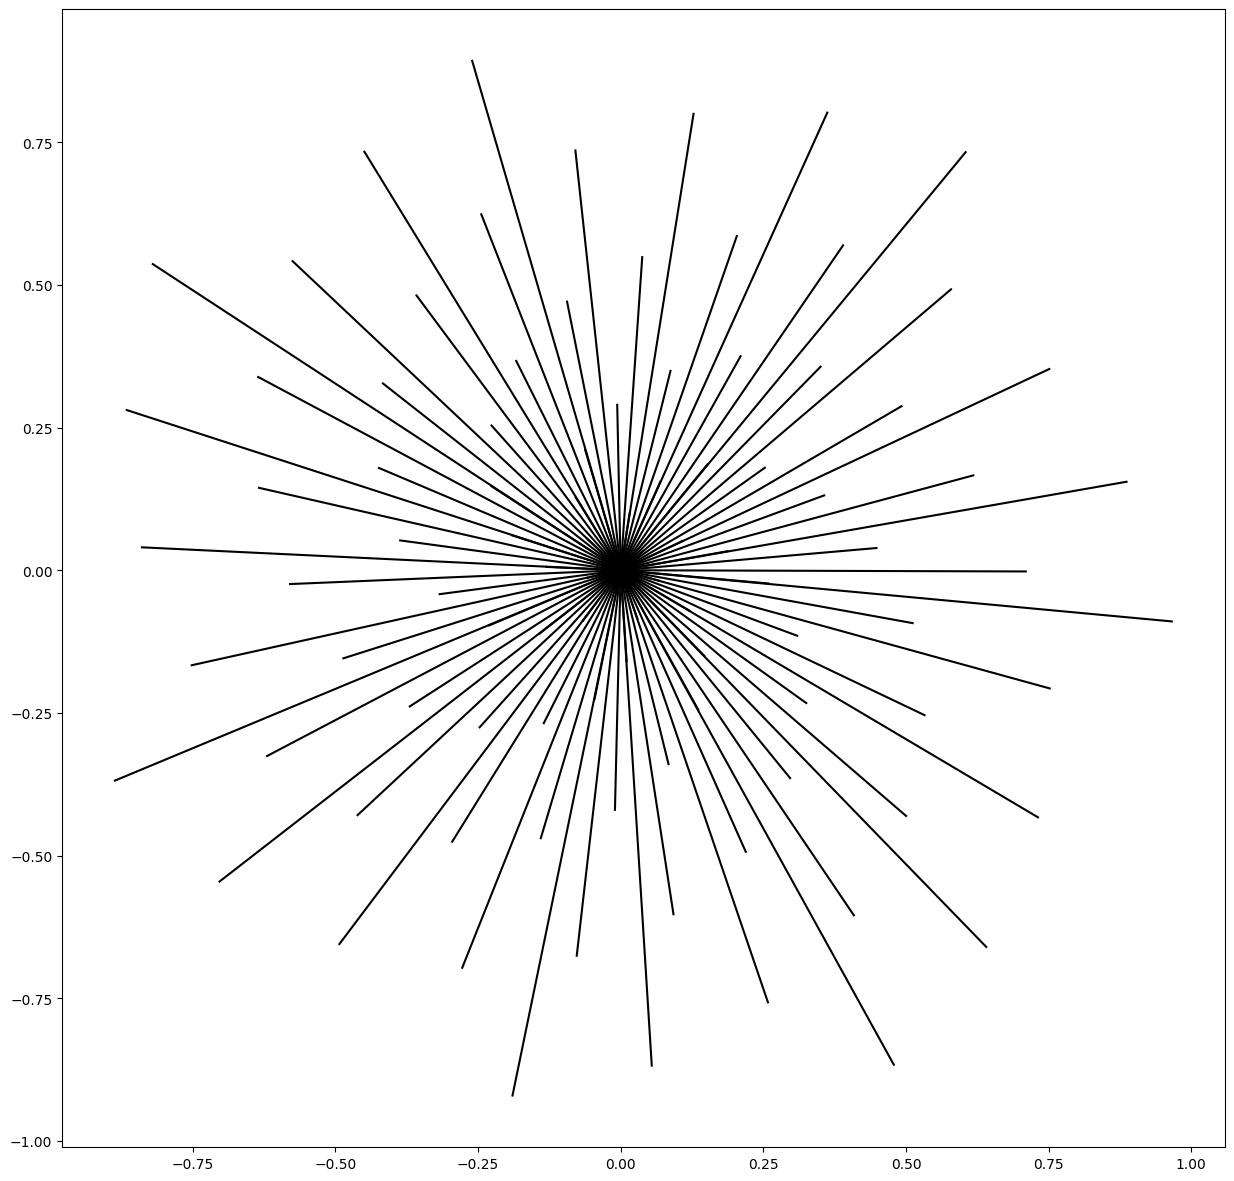

size: 185.22318044546552 181.35124680623736


In [19]:
# basic star, symmetric, spiral
xs, ys = [], []

for i in range(100):
    r = 0.01 * i
    theta = i * 500
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    xs.append([0,x])
    ys.append([0,y])

show(xs, ys)
save(xs, ys, f"star-symmetric.svg")


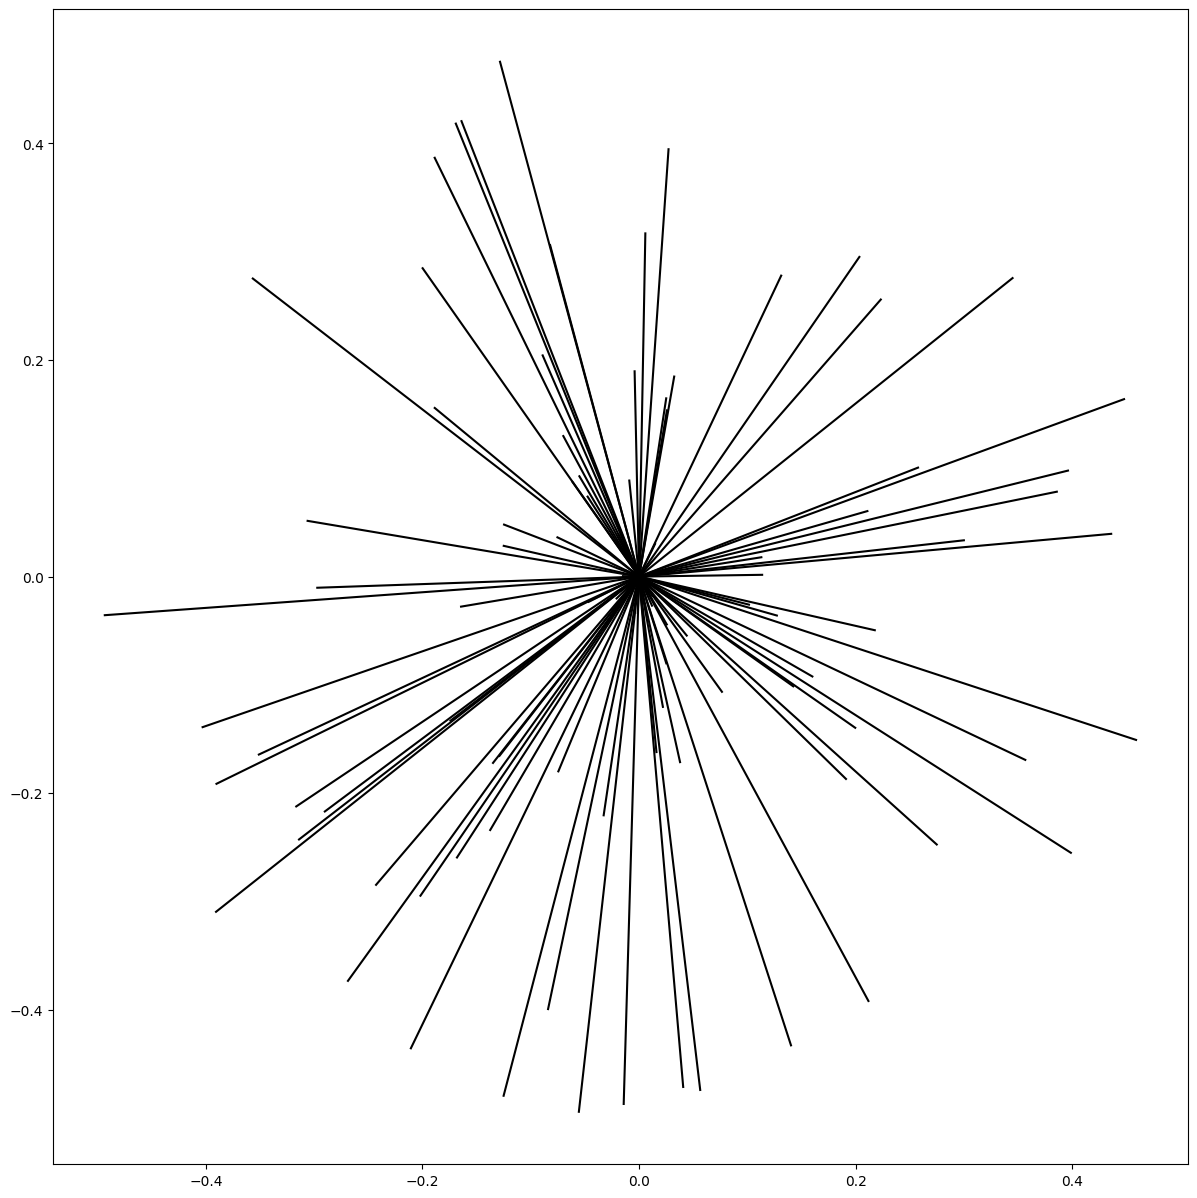

In [ ]:
# basic star, random
xs, ys = [], []

for i in range(100):
    r = random.uniform(0, 0.5)
    theta = random.uniform(0, 2*math.pi)
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    xs.append([0,x])
    ys.append([0,y])

show(xs, ys)
save(xs, ys, f"star-rndm.svg")

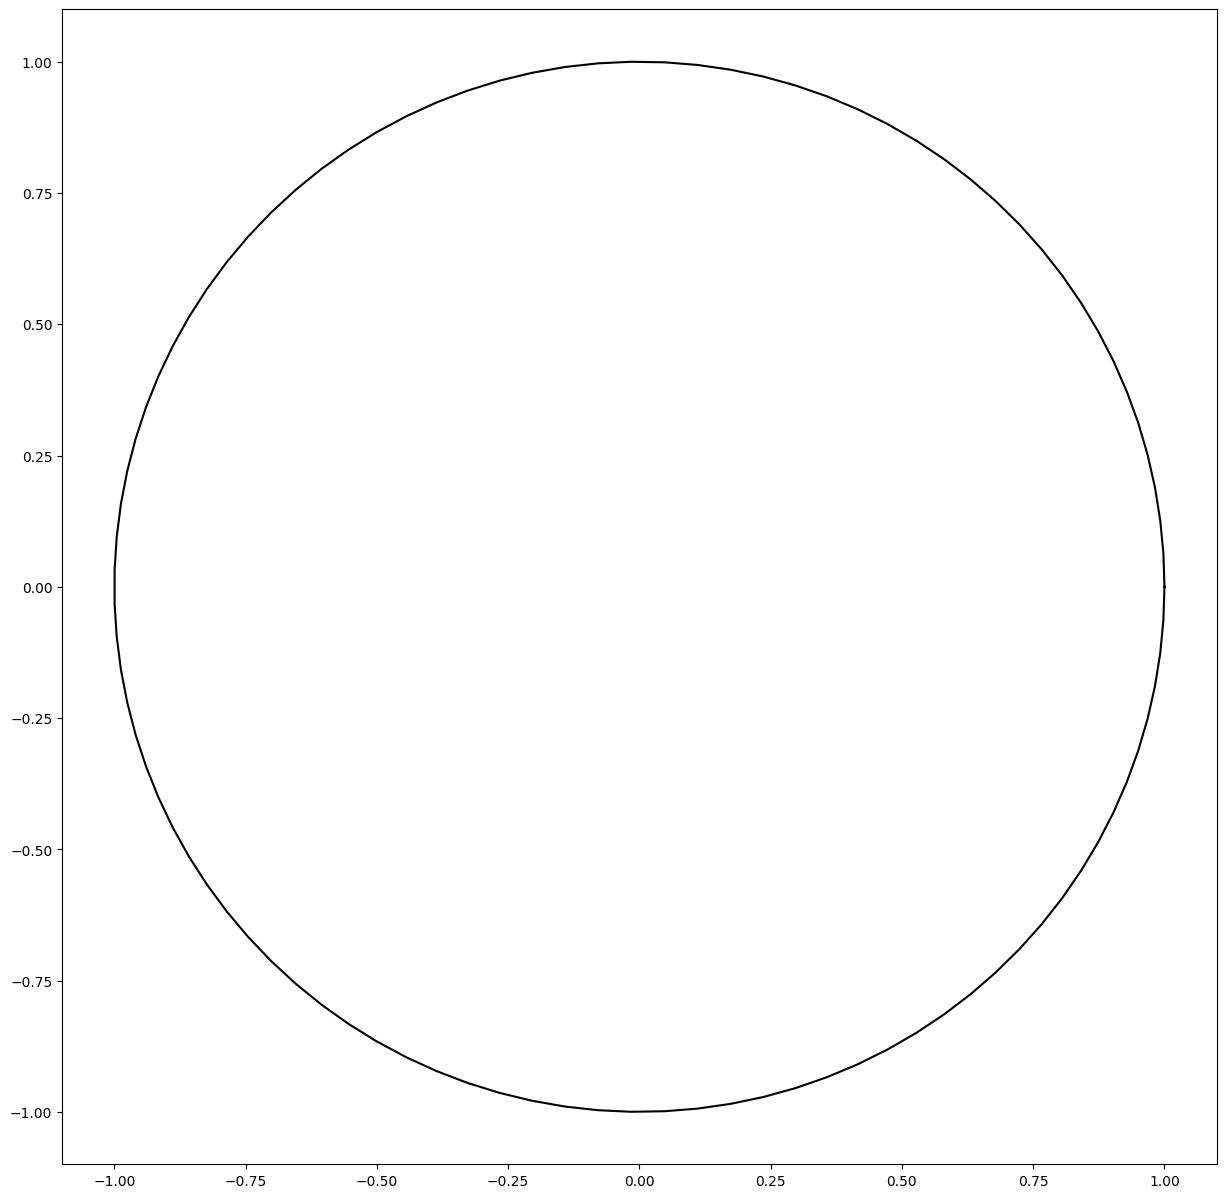

In [ ]:
# plain circle
xs, ys = [], []
xx, yy = [], []

N = 100

for i in range(N):
    r = 1
    theta = 2*math.pi * i/(N-1)
    x = r * math.cos(theta)
    y = r * math.sin(theta)

    xx.append(x)
    yy.append(y)

xs.append(xx)
ys.append(yy)

show(xs, ys)
save(xs, ys, f"plain-circle.svg")

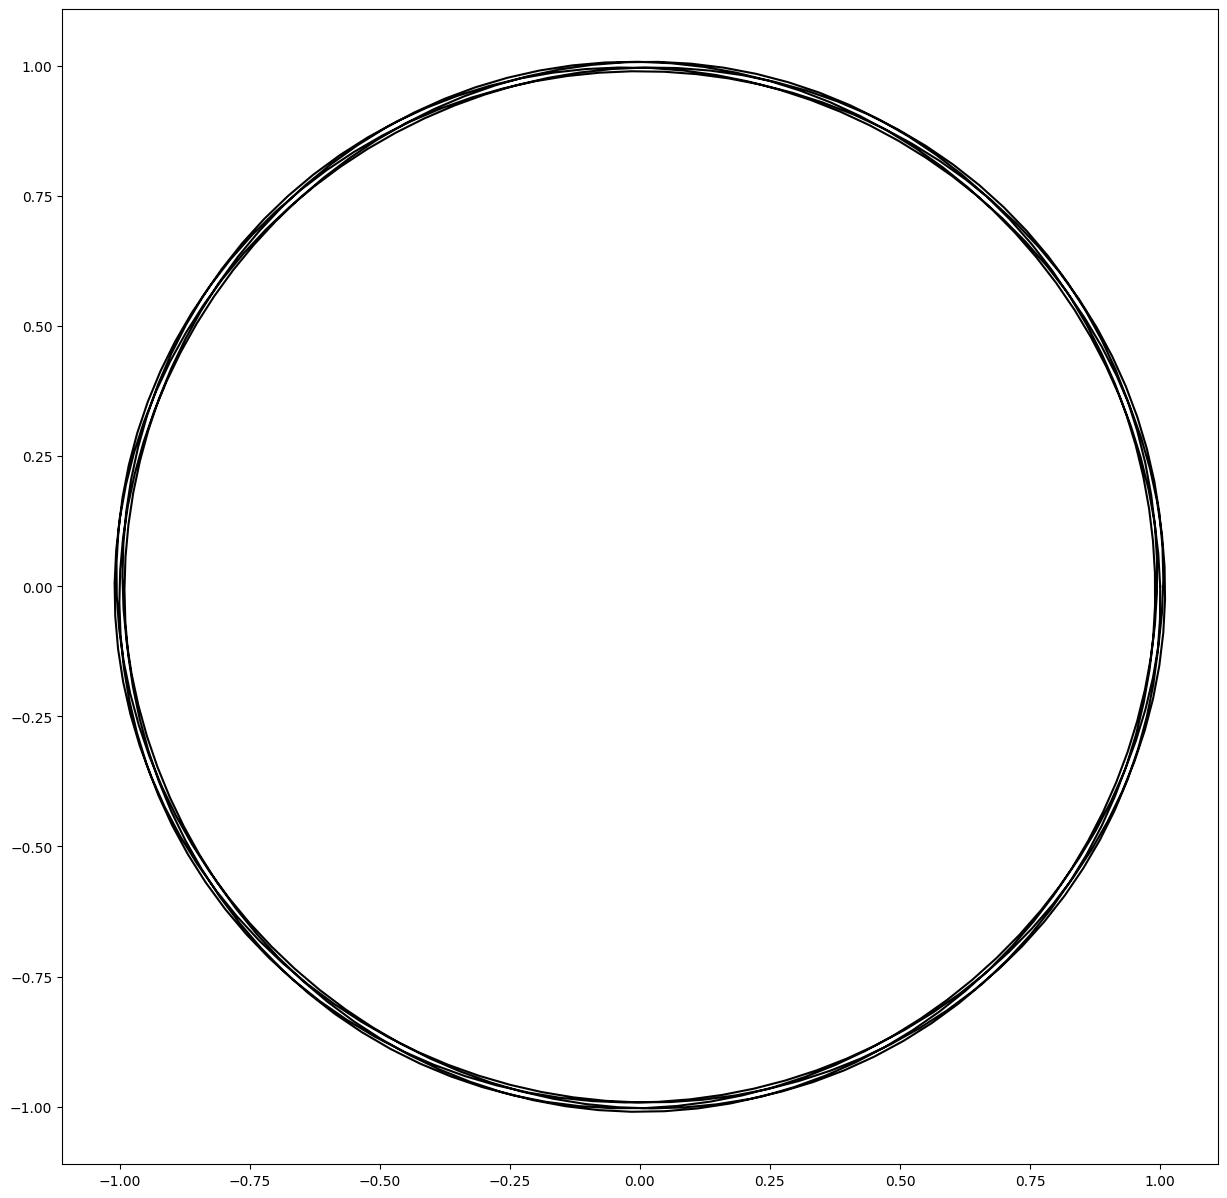

In [ ]:
# inner circle wobble 
xs, ys = [], []
xx, yy = [], []

N = 500

for i in range(N):
    t = i/(N-1) # 0...1
    r = 1 + math.sin(2*math.pi * t * 13) * 0.01  # 1 + *wobblewobble*
    theta = 2*math.pi * t * 5 # 5 circumferences around circle
    x = r * math.cos(theta)
    y = r * math.sin(theta)

    xx.append(x)
    yy.append(y)

xs.append(xx)
ys.append(yy)

show(xs, ys)
save(xs, ys, f"circle-wobble.svg")

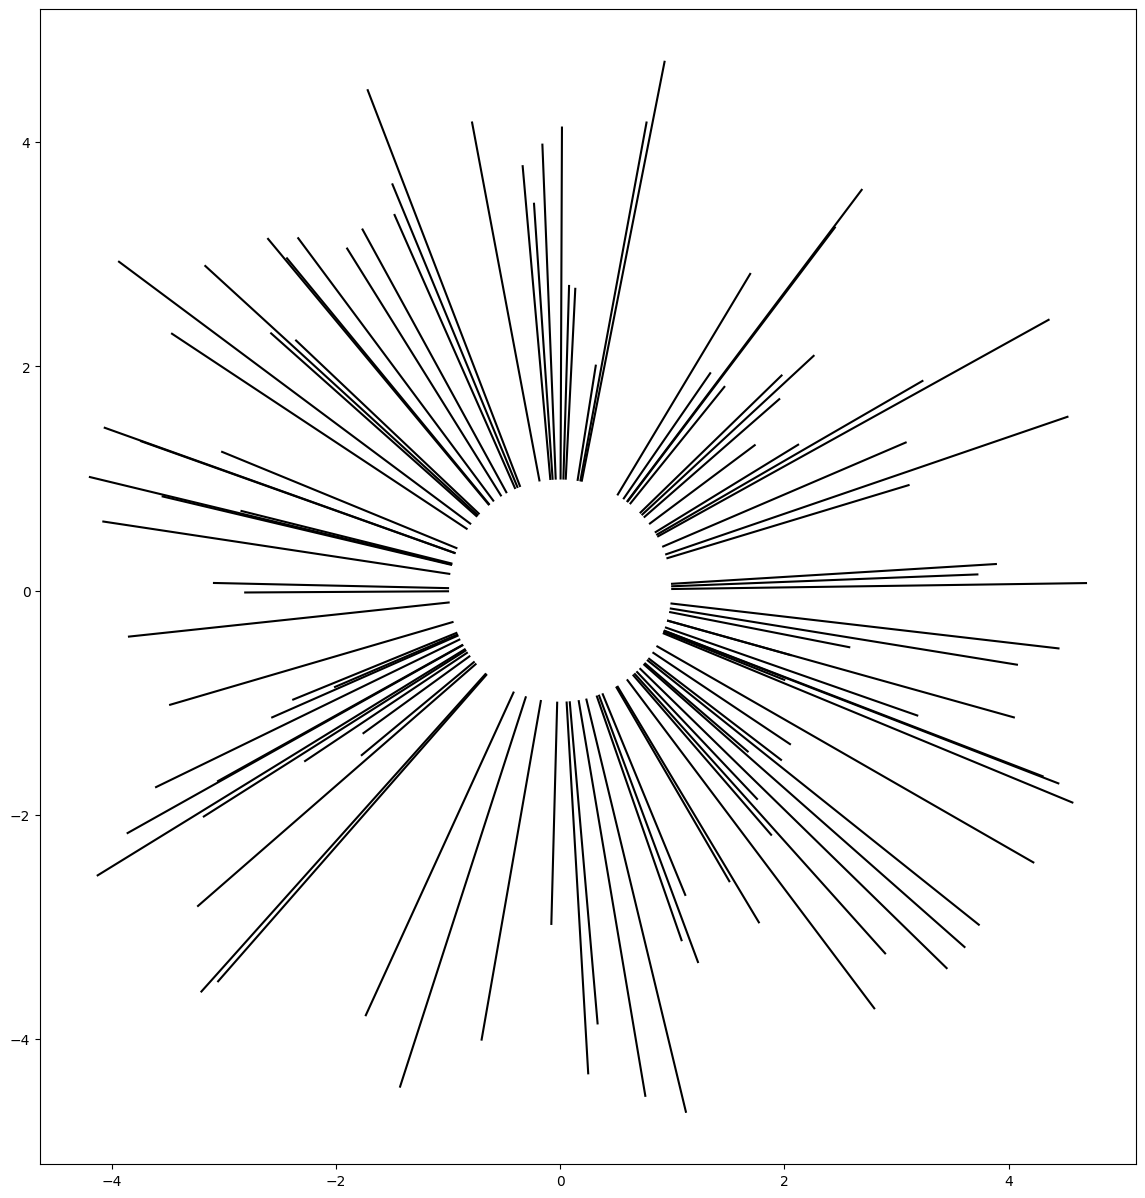

size: 888.4445726101667 936.5291144155668


In [27]:
# circle rays
xs, ys = [], []

for i in range(100):
    r1 = 1
    r2 = random.uniform(2, 5)
    theta = random.uniform(0, 2*math.pi)

    x1 = r1 * math.cos(theta)
    y1 = r1 * math.sin(theta)

    x2 = r2 * math.cos(theta)
    y2 = r2 * math.sin(theta)

    xs.append([x1,x2])
    ys.append([y1,y2])

show(xs, ys)
save(xs, ys, f"circle-rays.svg")

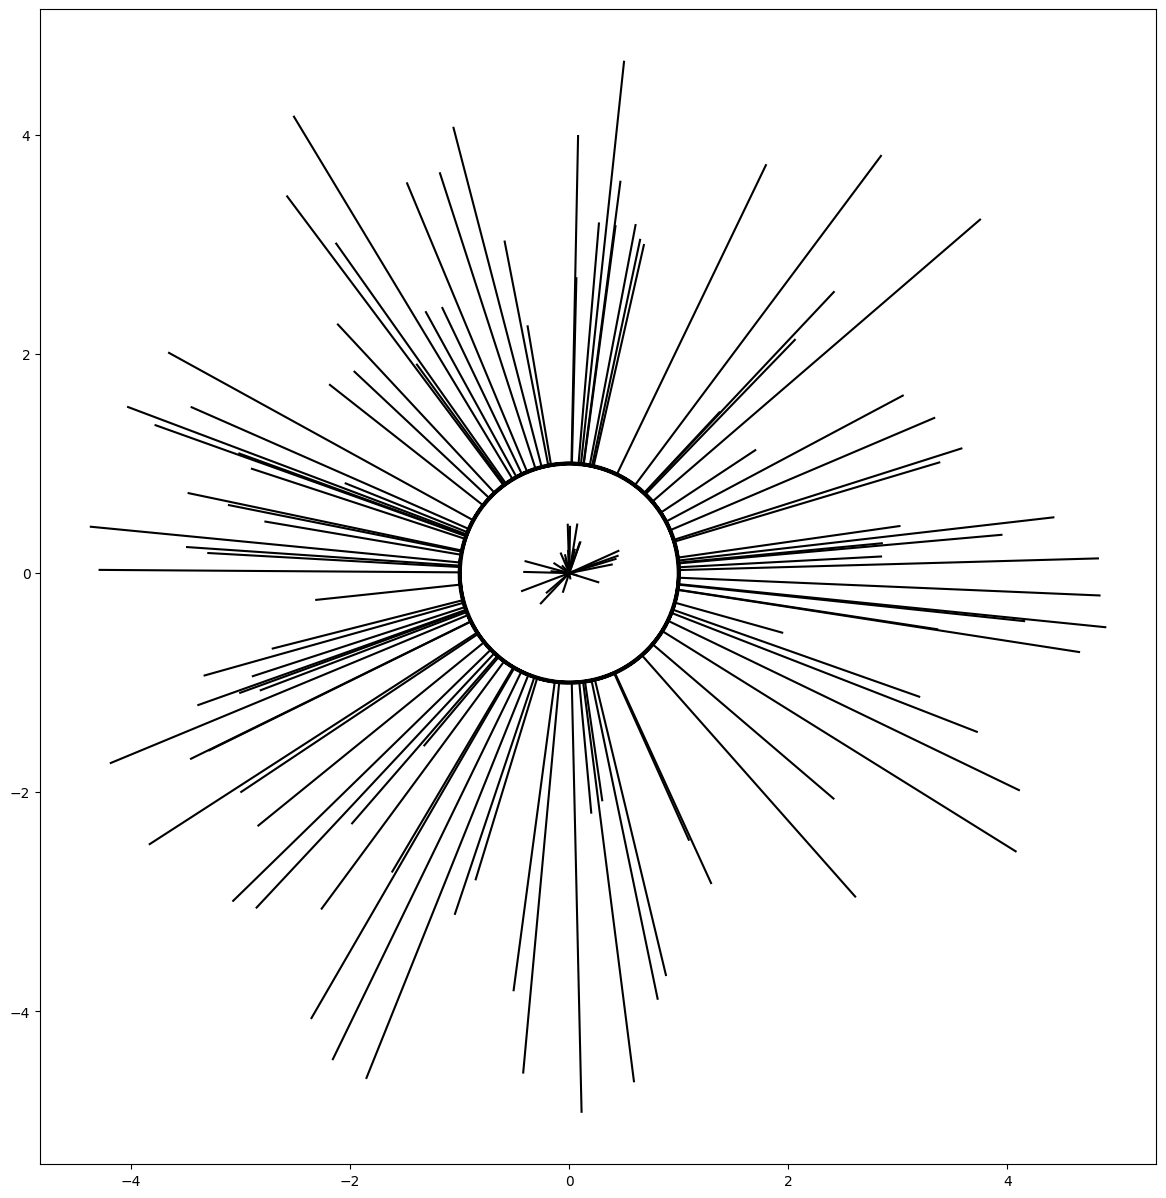

size: 925.9699166215872 958.409110779324


In [28]:
# All combines

xs, ys = [], []

# random basic star
for i in range(30):
    r = random.uniform(0, 0.5)
    theta = random.uniform(0, 2*math.pi)
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    xs.append([0,x])
    ys.append([0,y])

# circle wobble
xx, yy = [], []
N = 500

for i in range(N):
    t = i/(N-1) # 0...1
    r = 1 + math.sin(2*math.pi * t * 13) * 0.01  # 1 + *wobblewobble*
    theta = 2*math.pi * t * 5 # 5 circumferences around circle
    x = r * math.cos(theta)
    y = r * math.sin(theta)

    xx.append(x)
    yy.append(y)

xs.append(xx)
ys.append(yy)


# outer rays
for i in range(100):
    r1 = 1
    r2 = random.uniform(2, 5)
    theta = random.uniform(0, 2*math.pi)

    x1 = r1 * math.cos(theta)
    y1 = r1 * math.sin(theta)

    x2 = r2 * math.cos(theta)
    y2 = r2 * math.sin(theta)

    xs.append([x1,x2])
    ys.append([y1,y2])


show(xs, ys)
save(xs, ys, f"combined.svg")